<a href="https://colab.research.google.com/github/sajan-sarker/machine-learning/blob/main/neurons_and_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

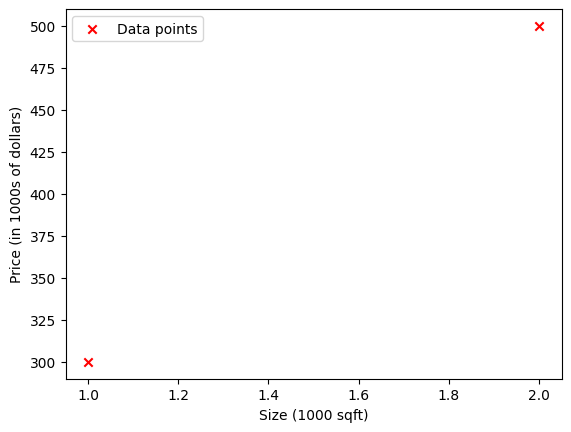

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
y_train = np.array([[300.0], [500.0]], dtype=np.float32)

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, y_train, marker='x', c='r', label = 'Data points')
ax.legend()
ax.set_ylabel("Price (in 1000s of dollars)")
ax.set_xlabel("Size (1000 sqft)")
plt.show()

In [4]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
linear_layer.get_weights()

[]

In [7]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.16120124]], shape=(1, 1), dtype=float32)


In [8]:
w, b = linear_layer.get_weights()
print(f'W: {w}, B: {b}')

W: [[0.16120124]], B: [0.]


In [9]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [10]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [11]:
predict_tf = linear_layer(X_train)
predict_np = np.dot(X_train, set_w) + set_b

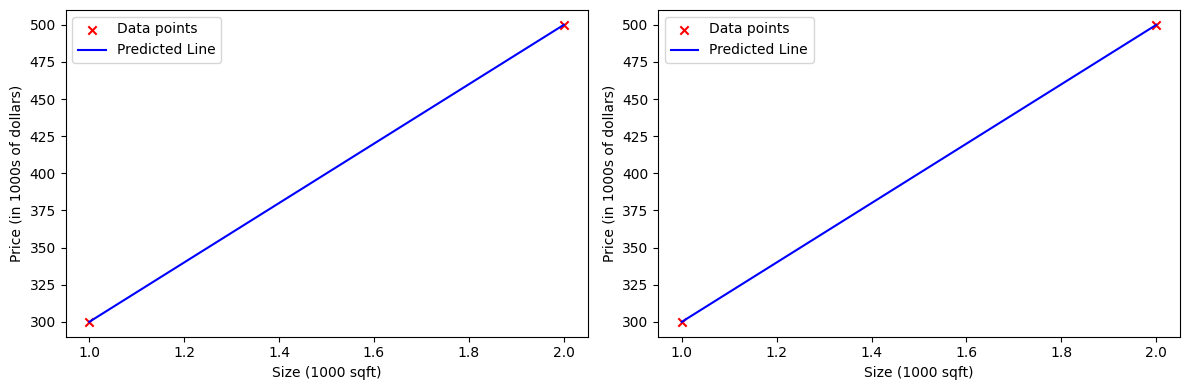

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(X_train, y_train, marker='x', c='r', label = 'Data points')
#ax.scatter(X_train, predict_tf, marker='o', c='b', label = 'Predicted points')
ax[0].plot(X_train, predict_tf, c = 'b', label = 'Predicted Line')
ax[1].scatter(X_train, y_train, marker='x', c='r', label = 'Data points')
ax[1].plot(X_train, predict_np, c = 'b', label = 'Predicted Line')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel("Price (in 1000s of dollars)")
ax[0].set_xlabel("Size (1000 sqft)")
ax[1].set_ylabel("Price (in 1000s of dollars)")
ax[1].set_xlabel("Size (1000 sqft)")
plt.tight_layout()
plt.show()

In [25]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

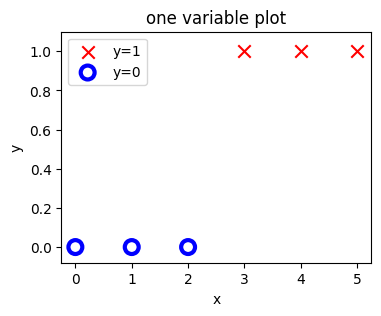

In [35]:
pos = Y_train == 1
neg = Y_train == 0

fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label='y=1')
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label='y=0', facecolors='none', edgecolors='b', lw=3)

ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('one variable plot')
ax.legend()
plt.show()

In [36]:
# Logistic Neuron
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[0.15758657]] [0.]
(1, 1) (1,)


In [39]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [41]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.01098694]]
